In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
staff_df = pd.read_excel("./datasets/MonthlyStaffPayrun.xlsx")
payroll_calendar_df = pd.read_excel("./datasets/PayrollCalendar.xlsx")
sales_staff_df = pd.read_excel("./datasets/SalesStaff.xlsx")
store_location_df = pd.read_excel("./datasets/StoreLocation.xlsx")

In [3]:
print("Staff Dataset:",staff_df.shape)
print("Payroll and Calendar Dataset:", payroll_calendar_df.shape)
print("Sales and Staff Dataset:", sales_staff_df.shape)
print("Store Location Dataset:", store_location_df.shape)

Staff Dataset: (3528, 15)
Payroll and Calendar Dataset: (365, 7)
Sales and Staff Dataset: (297, 13)
Store Location Dataset: (307, 8)


In [4]:
payroll_calendar_df.head()

,DateKey,DisplayDate,DayAbbr,MonthAbbr,MonthNum,YearMonth,YearNum
0,20190101,2019-01-01,Tue,Jan,1,20191,2019
1,20190102,2019-01-02,Wed,Jan,1,20191,2019
2,20190103,2019-01-03,Thu,Jan,1,20191,2019
3,20190104,2019-01-04,Fri,Jan,1,20191,2019
4,20190105,2019-01-05,Sat,Jan,1,20191,2019


In [5]:
staff_df.head()

,DateKey,YearMonth,YearNbr,MonthNbr,LocationId,LocationName,EmployeeId,TotalSales,BonusPaid,GrossWages,HealthPlanPaid,ParkingSubsPaid,TransportSubsPaid,TrainingSubsPaid,EmployerPensionPaid
0,20190101,20191,2019,1,600,Head Office,5000,0.000,0.00000,19918.0000,1493.850000,250.0,0.0,0,1991.80000
1,20190101,20191,2019,1,304,Saint Petersburg Discount Store,14,16051.940,272.88298,3417.4525,256.308938,NaN,25.0,25,341.74525
2,20190101,20191,2019,1,305,Nizhny Novgorod Discount Store,15,13471.724,336.79310,4084.2725,306.320438,NaN,25.0,25,408.42725
3,20190101,20191,2019,1,302,Taipei Discount Store,24,47856.264,8135.56488,3324.3575,249.326812,NaN,25.0,25,332.43575
4,20190101,20191,2019,1,303,Lisbon Discount Store,25,7393.120,125.68304,3683.7475,276.281063,NaN,25.0,25,368.37475


In [9]:
sales_staff_df.head()

,EmployeeId,LocationId,StaffMember,Title,EmpStartDate,MinWeekHrs,BaseHourlyRate,BonusPct,HealthPlanPct,ParkingSubsidy,TransportSubsidy,TrainingSubsidy,EmployerPensionPlan
0,5000,600,Geoff M Bates,CEO,2010-11-01,40.0,115.0,0.000,0.075,NaN,0.0,0,0.1
1,15,305,Kim Akers,Snr Sales Specialist,2010-11-02,38.5,24.5,0.025,0.075,NaN,25.0,25,0.1
2,14,304,Miguel Saenz,Sales Specialist,2018-01-03,38.5,20.5,0.017,0.075,NaN,25.0,25,0.1
3,25,303,Antonio Alwan,Sales Specialist,2018-01-04,41.5,20.5,0.017,0.075,NaN,25.0,25,0.1
4,24,302,Ming-Yang Xie,Jnr Sales Specialist,2019-01-05,41.5,18.5,0.170,0.075,NaN,25.0,25,0.1


In [10]:
store_location_df.head()

,LocationId,LocationType,LocationName,Latitude,Longitude,Country,StateProvince,City
0,1,Store,Seattle No.1 Discount Store,47.6275,-122.352,United States,Washington,Seattle
1,2,Store,Seattle No.2 Discount Store,47.6474,-122.375,United States,Washington,Seattle
2,3,Store,Kennewick Discount Store,46.2005,-119.181,United States,Washington,Kennewick
3,4,Store,Bellevue Discount Store,47.5997,-122.147,United States,Washington,Bellevue
4,5,Store,Redmond Discount Store,47.6732,-122.116,United States,Washington,Redmond


In [13]:
from datetime import datetime

today = datetime.today()

sales_staff_df["YearExperience"] = sales_staff_df["EmpStartDate"].apply(lambda x: (today.year - x.year) - ((today.month, today.day) < (x.month, x.day)))

sales_staff_df.head()

,EmployeeId,LocationId,StaffMember,Title,EmpStartDate,MinWeekHrs,BaseHourlyRate,BonusPct,HealthPlanPct,ParkingSubsidy,TransportSubsidy,TrainingSubsidy,EmployerPensionPlan,YearExperience
0,5000,600,Geoff M Bates,CEO,2010-11-01,40.0,115.0,0.000,0.075,NaN,0.0,0,0.1,14
1,15,305,Kim Akers,Snr Sales Specialist,2010-11-02,38.5,24.5,0.025,0.075,NaN,25.0,25,0.1,14
2,14,304,Miguel Saenz,Sales Specialist,2018-01-03,38.5,20.5,0.017,0.075,NaN,25.0,25,0.1,7
3,25,303,Antonio Alwan,Sales Specialist,2018-01-04,41.5,20.5,0.017,0.075,NaN,25.0,25,0.1,7
4,24,302,Ming-Yang Xie,Jnr Sales Specialist,2019-01-05,41.5,18.5,0.170,0.075,NaN,25.0,25,0.1,6


In [14]:
staff_df["DateKey"] = staff_df["DateKey"].astype(str)

staff_df["Date"] = pd.to_datetime(staff_df["DateKey"].str[:4]+"-"+ staff_df["DateKey"].str[4:6] +"-"+ staff_df["DateKey"].str[6:])

staff_df["Date"] = staff_df["Date"].dt.date

staff_df = staff_df.drop(["DateKey", "YearMonth", "YearNbr", "MonthNbr"],axis=1)

staff_df.head()

,LocationId,LocationName,EmployeeId,TotalSales,BonusPaid,GrossWages,HealthPlanPaid,ParkingSubsPaid,TransportSubsPaid,TrainingSubsPaid,EmployerPensionPaid,Date
0,600,Head Office,5000,0.000,0.00000,19918.0000,1493.850000,250.0,0.0,0,1991.80000,2019-01-01
1,304,Saint Petersburg Discount Store,14,16051.940,272.88298,3417.4525,256.308938,NaN,25.0,25,341.74525,2019-01-01
2,305,Nizhny Novgorod Discount Store,15,13471.724,336.79310,4084.2725,306.320438,NaN,25.0,25,408.42725,2019-01-01
3,302,Taipei Discount Store,24,47856.264,8135.56488,3324.3575,249.326812,NaN,25.0,25,332.43575,2019-01-01
4,303,Lisbon Discount Store,25,7393.120,125.68304,3683.7475,276.281063,NaN,25.0,25,368.37475,2019-01-01


In [15]:
staff_analysis = staff_df.groupby(["EmployeeId", "Date"])["TotalSales"].sum().reset_index(name="Total")

result_df = pd.merge(staff_analysis, sales_staff_df,on="EmployeeId", how="inner")

result_df = result_df.pivot_table(index="StaffMember", columns="Date", values="Total").reset_index()

In [16]:
staff_analysis = staff_df.groupby(["EmployeeId", "Date"]).agg({
    "TotalSales":"sum", "GrossWages":"sum"
}).reset_index()

staff_analysis = staff_analysis.rename(columns={"TotalSales":"Total", "GrossWages":"Gross"})

result_df = pd.merge(staff_analysis, sales_staff_df,on="EmployeeId", how="inner")

total_sales = result_df.pivot_table(index="StaffMember", columns="Date", values="Total").reset_index()

total_sales

Date,StaffMember,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
0,Aaron Con,4094.0100,23228.1400,24524.4995,23975.000,12522.200,20819.200,18690.800,13133.150,12758.613,11892.000,18656.2140,15741.5520
1,Aaron Nicholls,19783.4000,10338.0000,31938.5500,14929.900,14728.900,36710.000,6185.064,23423.342,22672.300,9129.800,13908.7420,8483.9460
2,Adam Barr,18909.8000,12465.3150,7837.8205,35564.700,19909.600,18373.800,1961.470,19859.363,14232.560,13998.900,17150.7000,22957.9460
3,Adam Savage,23206.5165,29844.2580,26120.8920,47823.662,31600.046,30819.048,49458.480,41447.000,72839.700,49027.600,22211.5925,43977.7455
4,Adina Hagege,20334.4595,53729.6480,18145.4620,39275.056,36075.509,31793.796,30979.560,44223.300,28288.300,64220.600,36390.0815,60029.3140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,Witold Dyszkiewicz,10753.6000,12417.7212,31249.5277,17783.160,12468.000,16082.000,4699.800,5571.643,16355.123,6667.968,14639.2000,9364.0600
290,Yael Peled,4709.4200,5072.1225,23887.4050,6489.800,7024.500,14388.900,17183.427,29285.484,21895.940,639.600,20698.7020,37824.3400
291,Yaniv Feinberg,16108.7000,17556.5253,19049.2680,14235.360,14869.900,15399.800,1318.800,4724.720,16783.094,10494.942,9818.8860,3629.4000
292,Yossi Ran,9513.4105,18208.9205,17805.5000,16112.900,12699.800,31995.600,16313.400,11836.650,15459.596,2900.000,13247.7400,18513.6000


In [17]:
total_gross = result_df.pivot_table(index="StaffMember", columns="Date", values="Gross").reset_index()

total_gross

Date,StaffMember,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
0,Aaron Con,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000
1,Aaron Nicholls,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000
2,Adam Barr,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000,3550.6000
3,Adam Savage,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475
4,Adina Hagege,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475,3683.7475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,Witold Dyszkiewicz,2684.6000,2684.6000,2684.6000,2684.6000,2684.6000,2684.6000,2684.6000,2684.6000,2684.6000,2684.6000,2684.6000,2684.6000
290,Yael Peled,4243.4000,4243.4000,4243.4000,4243.4000,4243.4000,4243.4000,4243.4000,4243.4000,4243.4000,4243.4000,4243.4000,4243.4000
291,Yaniv Feinberg,3417.4525,3417.4525,3417.4525,3417.4525,3417.4525,3417.4525,3417.4525,3417.4525,3417.4525,3417.4525,3417.4525,3417.4525
292,Yossi Ran,3204.2000,3204.2000,3204.2000,3204.2000,3204.2000,3204.2000,3204.2000,3204.2000,3204.2000,3204.2000,3204.2000,3204.2000


In [19]:
result_df["EmployeeId"] = result_df["EmployeeId"].astype(str)
result_df["StaffMember"] = result_df["StaffMember"].astype(str) 
result_df["StaffId"] = result_df["StaffMember"].fillna('') + " : " + result_df["EmployeeId"].fillna('')

result_df.head()

,EmployeeId,Date,Total,Gross,LocationId,StaffMember,Title,EmpStartDate,MinWeekHrs,BaseHourlyRate,BonusPct,HealthPlanPct,ParkingSubsidy,TransportSubsidy,TrainingSubsidy,EmployerPensionPlan,YearExperience,StaffId
0,14,2019-01-01,16051.9400,3417.4525,304,Miguel Saenz,Sales Specialist,2018-01-03,38.5,20.5,0.017,0.075,NaN,25.0,25,0.1,7,Miguel Saenz : 14
1,14,2019-02-01,3674.4400,3417.4525,304,Miguel Saenz,Sales Specialist,2018-01-03,38.5,20.5,0.017,0.075,NaN,25.0,25,0.1,7,Miguel Saenz : 14
2,14,2019-03-01,14425.3828,3417.4525,304,Miguel Saenz,Sales Specialist,2018-01-03,38.5,20.5,0.017,0.075,NaN,25.0,25,0.1,7,Miguel Saenz : 14
3,14,2019-04-01,13752.0000,3417.4525,304,Miguel Saenz,Sales Specialist,2018-01-03,38.5,20.5,0.017,0.075,NaN,25.0,25,0.1,7,Miguel Saenz : 14
4,14,2019-05-01,8459.6000,3417.4525,304,Miguel Saenz,Sales Specialist,2018-01-03,38.5,20.5,0.017,0.075,NaN,25.0,25,0.1,7,Miguel Saenz : 14


In [20]:
def plot_bar(df:pd.DataFrame, x_col, y_col,hue_col, palette='plasma'):

    plt.figure(figsize=(35, 18))
    sns.barplot(
    data=df, x=x_col, y=y_col,
    palette=palette, hue=hue_col, dodge=False)
    plt.show()

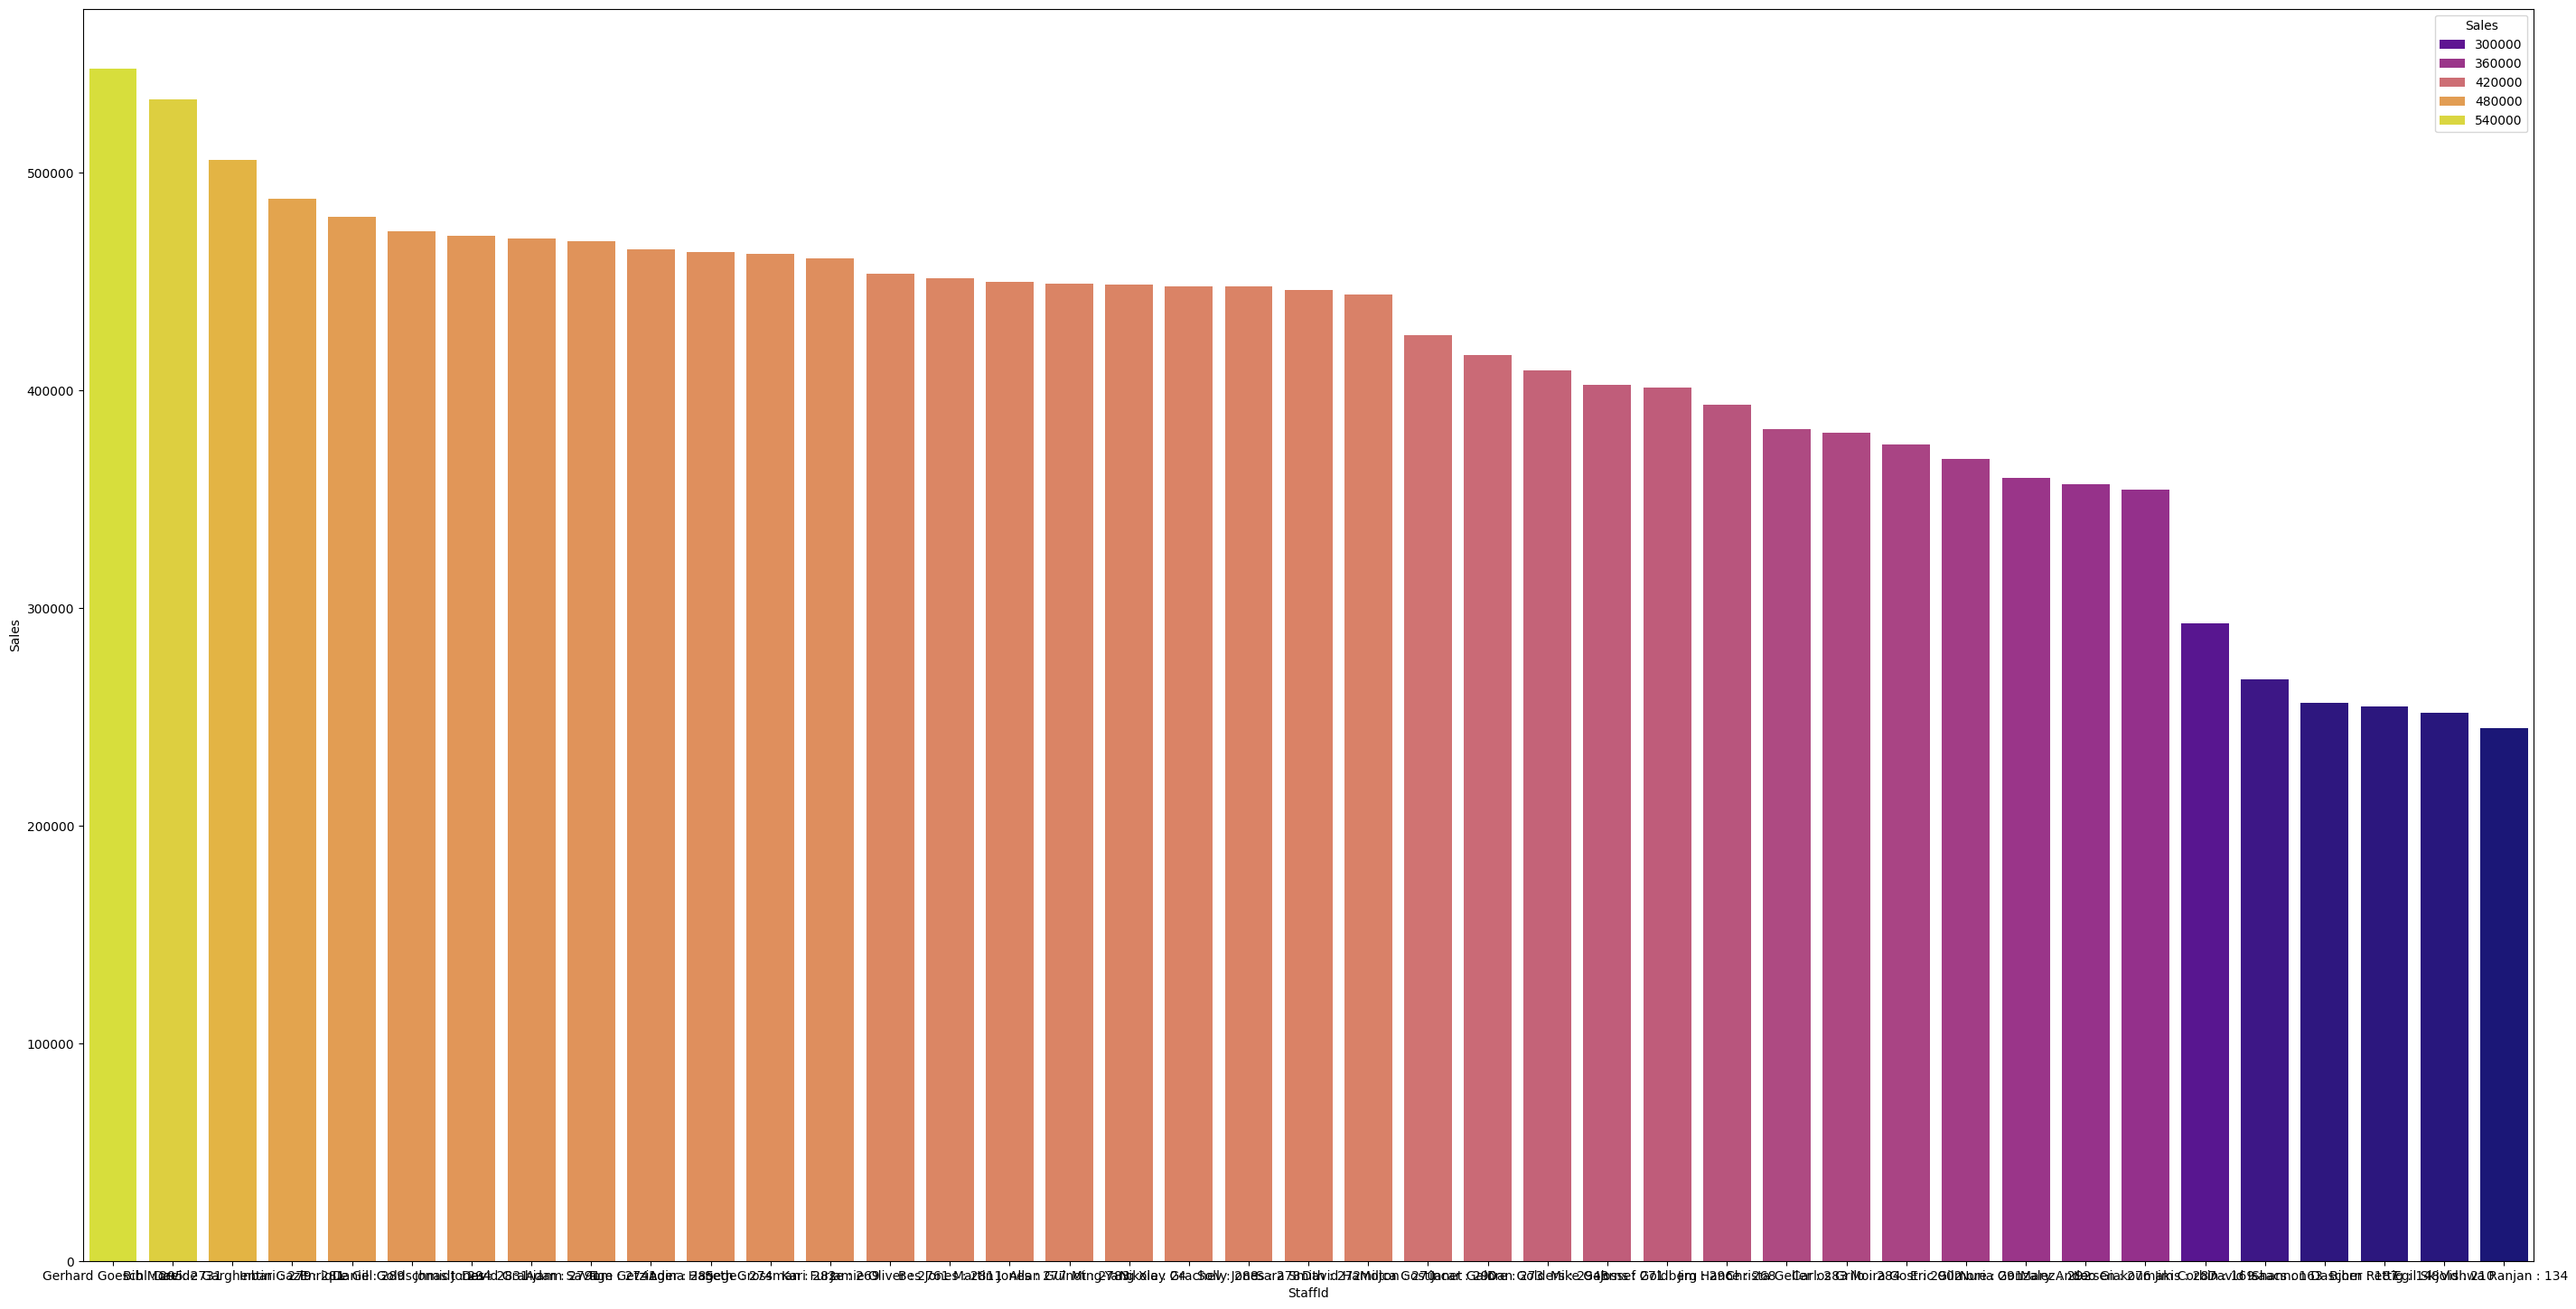

In [21]:
pareto_analysis = result_df.groupby("StaffId")["Total"].sum().reset_index(name="Sales").sort_values(by="Sales", ascending=False)

sample_analysis = pareto_analysis.reset_index().loc[:40]

plot_bar(df=sample_analysis, x_col="StaffId", y_col="Sales", hue_col="Sales", palette="plasma")

In [22]:
pareto_analysis["CumSum"] = pareto_analysis["Sales"].cumsum()

total_sum = pareto_analysis["Sales"].sum()

pareto_analysis["CF"] = round(pareto_analysis["CumSum"] / total_sum * 100, 2)

pareto_analysis.head()

,StaffId,Sales,CumSum,CF
114,Gerhard Goeschl : 295,547848.8490,5.478488e+05,0.88
41,Bib More : 2731,533612.1710,1.081461e+06,1.74
86,Davide Garghentini : 279,506021.1845,1.587482e+06,2.56
127,Inbar Gazit : 281,487828.5965,2.075311e+06,3.34
101,Enrique Gil : 289,479659.5360,2.554970e+06,4.12


In [23]:
pareto_analysis = pareto_analysis.reset_index()

sample_pareto_analysis = pareto_analysis.loc[:40]

sample_pareto_analysis.head()

,index,StaffId,Sales,CumSum,CF
0,114,Gerhard Goeschl : 295,547848.8490,5.478488e+05,0.88
1,41,Bib More : 2731,533612.1710,1.081461e+06,1.74
2,86,Davide Garghentini : 279,506021.1845,1.587482e+06,2.56
3,127,Inbar Gazit : 281,487828.5965,2.075311e+06,3.34
4,101,Enrique Gil : 289,479659.5360,2.554970e+06,4.12


In [64]:
def plot_pareto(df, x_col, y_col, cf, fig=(20, 8)):

    fig, ax1 = plt.subplots(figsize=fig)

    sns.barplot(x=x_col, y=y_col, data=df, color="skyblue", ax=ax1)
    ax1.set_ylabel(y_col, fontsize=14, color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

    ax2 = ax1.twinx()
    sns.lineplot(x=x_col, y=cf, data=df, color="red", marker="o", ax=ax2)
    ax2.set_ylabel("Cumulative Percentage (%)", fontsize=14, color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    plt.title("Pareto Chart", fontsize=16)
    plt.tight_layout()
    plt.show()


/var/folders/0n/r32p0lc14jbgb5t0c9mntm4h0000gn/T/ipykernel_2099/666277758.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


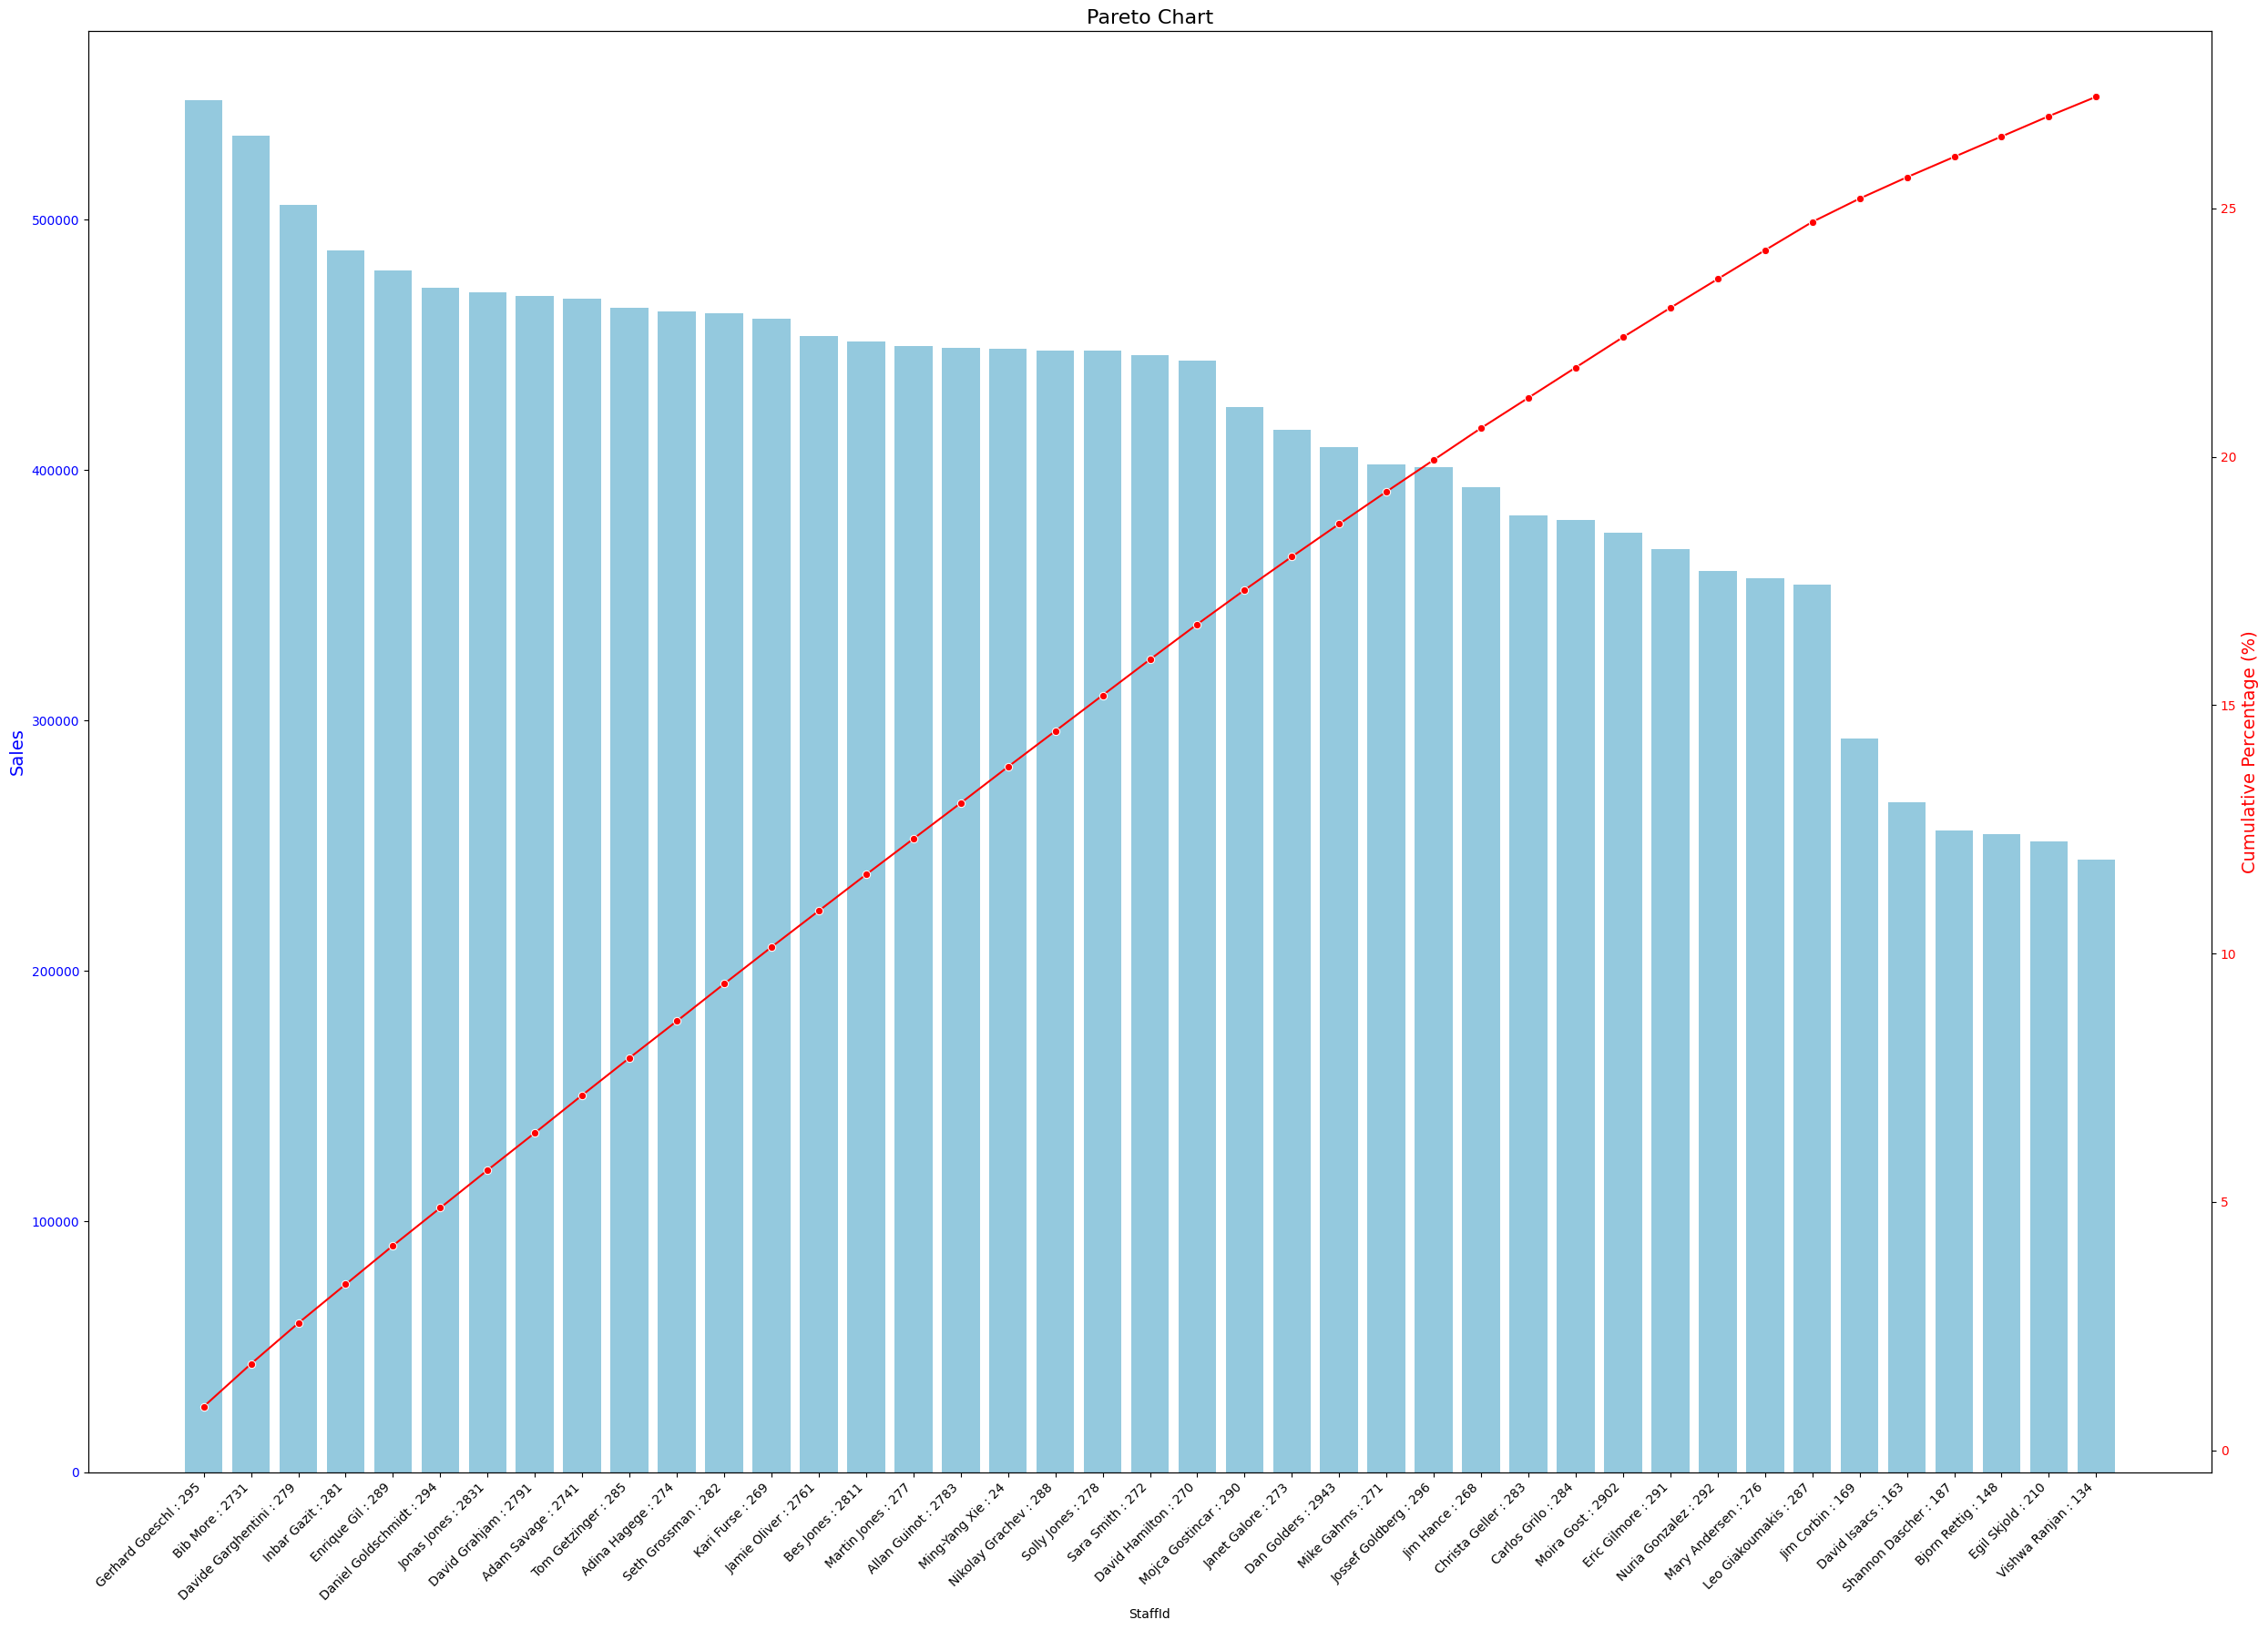

In [65]:
plot_pareto(df=sample_pareto_analysis, x_col="StaffId", y_col="Sales", cf="CF", fig=(25, 18))


## InLine Metric Analysis

In [25]:
result_df["Title"].unique()

array(['Sales Specialist', 'Snr Sales Specialist', 'Jnr Sales Specialist',
       'Sales Trainer', 'Sales Manager', 'Area Manager',
       'Sales Assistant', 'Product Sales Specialist ', 'CEO'],
      dtype=object)

/var/folders/0n/r32p0lc14jbgb5t0c9mntm4h0000gn/T/ipykernel_2099/3718458549.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=expendute_df, x="TotalSpent", y="Types", palette="Blues_r")


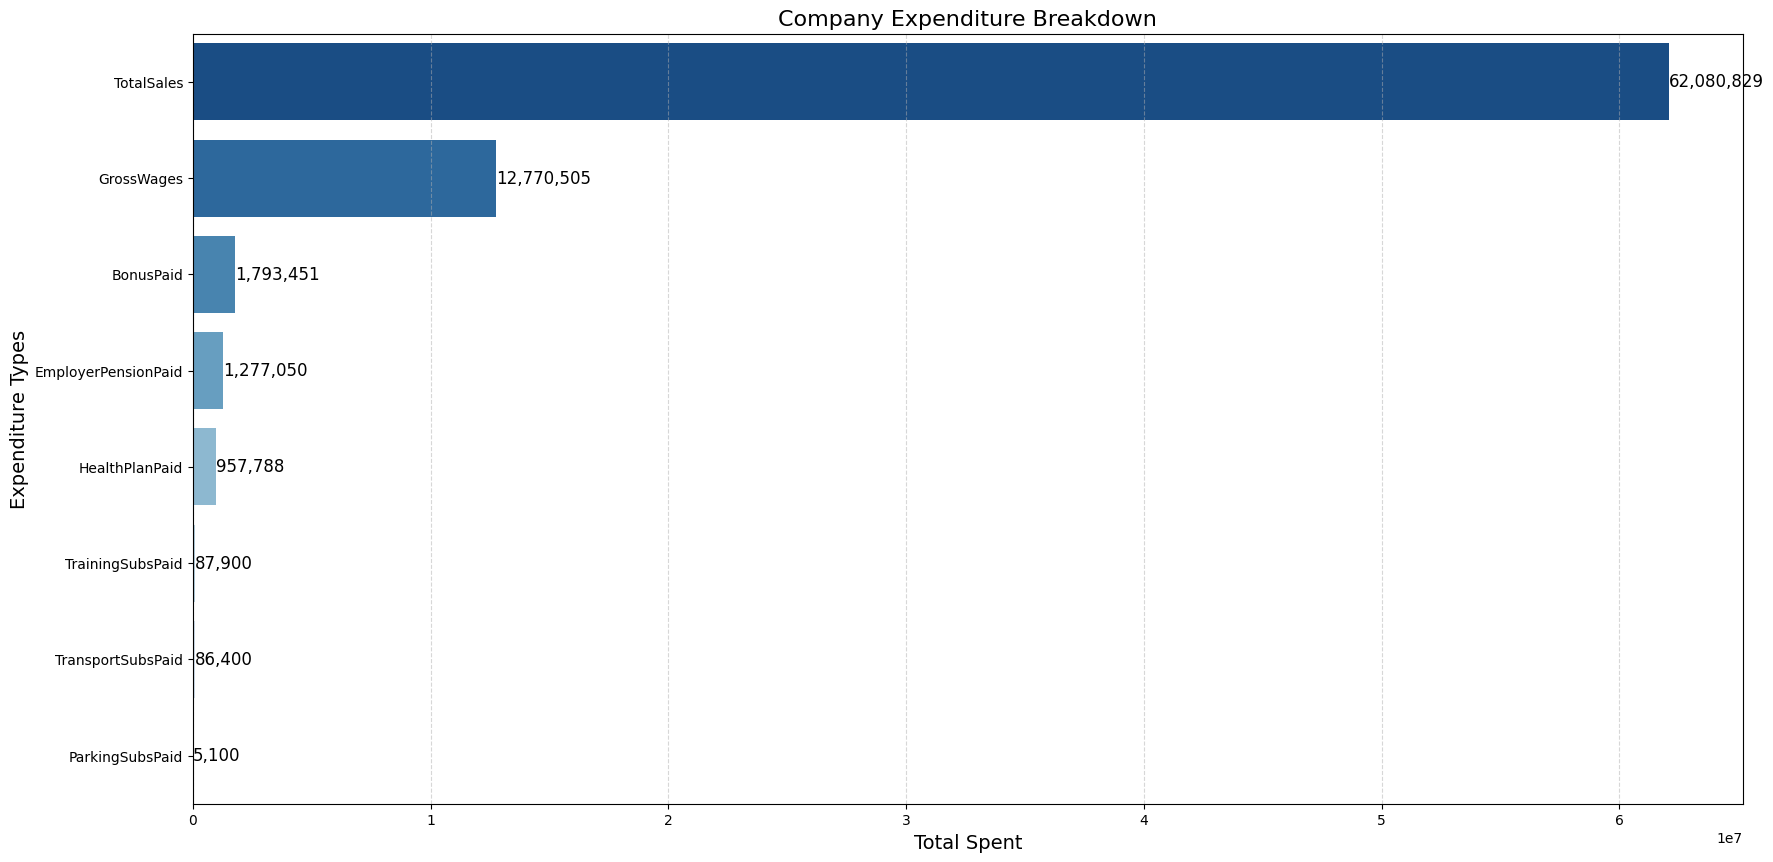

In [26]:
columns = staff_df.columns.tolist()[3:11]

data = []

for col in columns:
    data.append(staff_df[col].sum())


expendute_df = pd.DataFrame({
    "Types": columns, 
    "TotalSpent": data
}).sort_values(by="TotalSpent", ascending=False)


plt.figure(figsize=(20, 10))

ax = sns.barplot(data=expendute_df, x="TotalSpent", y="Types", palette="Blues_r")
for index, row in enumerate(expendute_df.itertuples()):
    plt.text(row.TotalSpent, index, f"{row.TotalSpent:,.0f}", 
             ha="left", va="center", fontsize=12, color="black")

plt.xlabel("Total Spent", fontsize=14)
plt.ylabel("Expenditure Types", fontsize=14)
plt.title("Company Expenditure Breakdown", fontsize=16)
plt.grid(axis="x", linestyle="--", alpha=0.5)  
plt.show()

In [35]:
employee_analysis = result_df.groupby("Title").agg({"Total":"sum", "EmployeeId":"nunique"}).reset_index().sort_values(by="Total", ascending=False)

total_sales_employee = employee_analysis["Total"].sum()

employee_analysis["CF"] = round(employee_analysis["Total"].cumsum() / total_sales_employee * 100, 2)

employee_analysis

,Title,Total,EmployeeId,CF
6,Sales Specialist,4.388001e+07,207,70.68
4,Sales Assistant,4.796120e+06,25,78.41
2,Jnr Sales Specialist,3.483939e+06,13,84.02
8,Snr Sales Specialist,3.441938e+06,17,89.56
7,Sales Trainer,3.332137e+06,18,94.93
3,Product Sales Specialist,1.491548e+06,8,97.33
0,Area Manager,1.081538e+06,5,99.08
5,Sales Manager,5.736051e+05,3,100.00
1,CEO,0.000000e+00,1,100.00


/var/folders/0n/r32p0lc14jbgb5t0c9mntm4h0000gn/T/ipykernel_2099/626125975.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


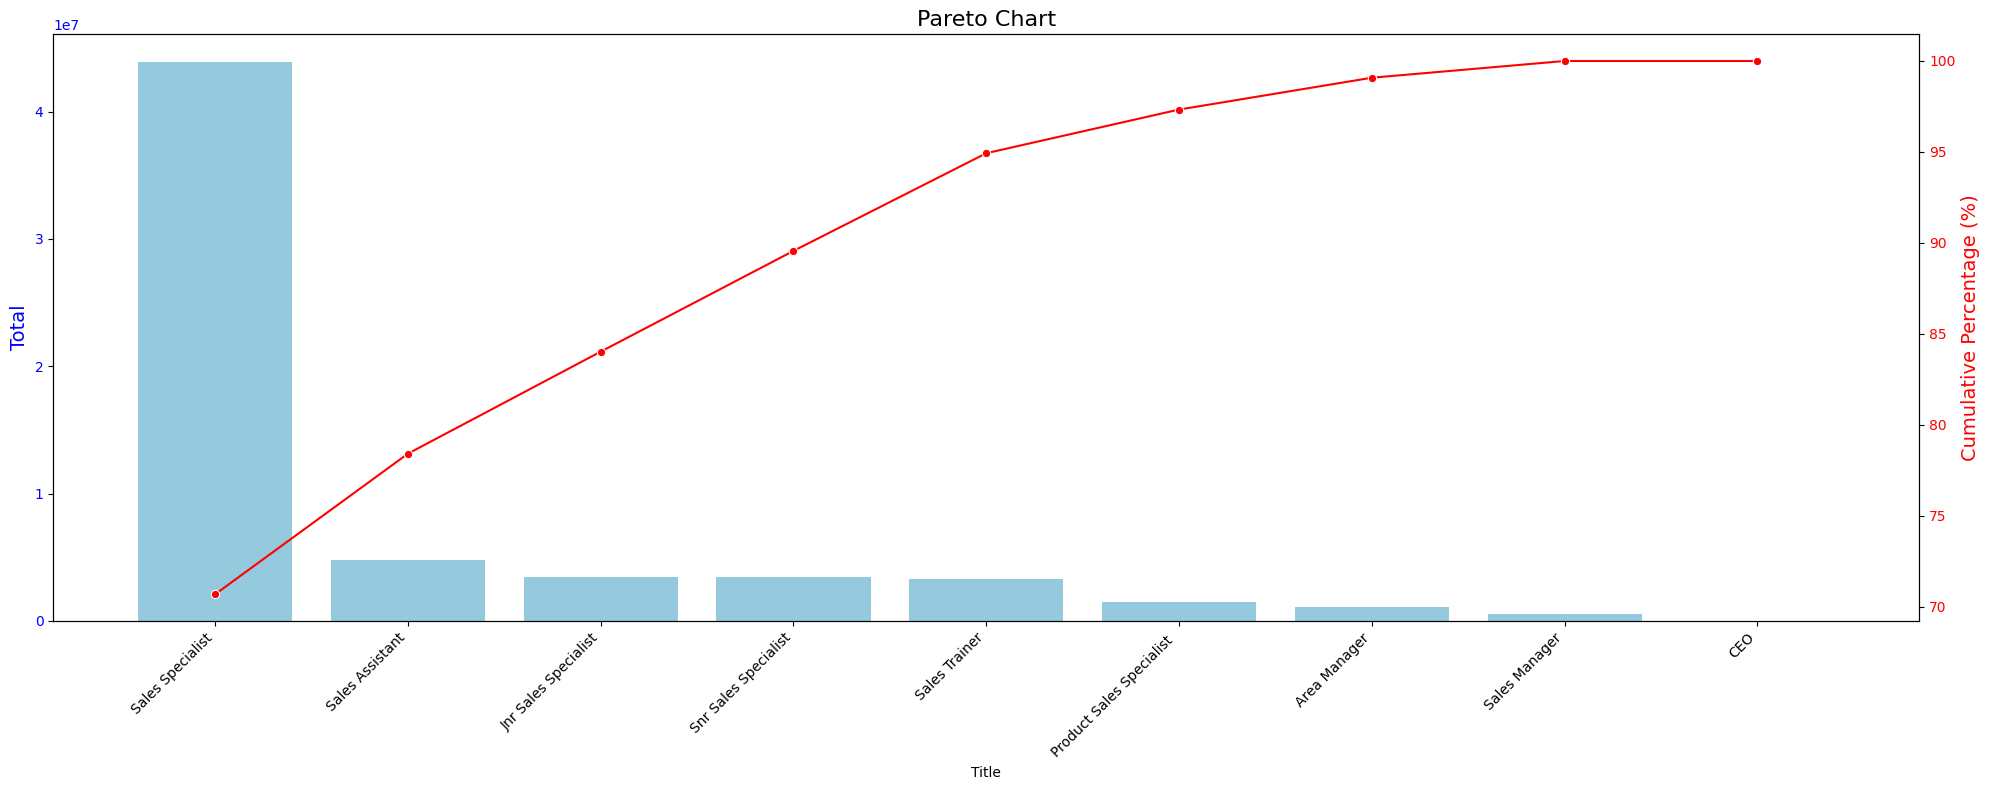

In [61]:
plot_pareto(df=employee_analysis, x_col="Title", y_col="Total", cf="CF")

In [41]:
store_location_df

,LocationId,LocationType,LocationName,Latitude,Longitude,Country,StateProvince,City
0,1,Store,Seattle No.1 Discount Store,47.627500,-122.352000,United States,Washington,Seattle
1,2,Store,Seattle No.2 Discount Store,47.647400,-122.375000,United States,Washington,Seattle
2,3,Store,Kennewick Discount Store,46.200500,-119.181000,United States,Washington,Kennewick
3,4,Store,Bellevue Discount Store,47.599700,-122.147000,United States,Washington,Bellevue
4,5,Store,Redmond Discount Store,47.673200,-122.116000,United States,Washington,Redmond
...,...,...,...,...,...,...,...,...
302,309,Reseller,Europe Reseller,48.864000,2.359060,France,Seine (Paris),Paris
303,310,Reseller,Asia Reseller,39.927000,116.431000,China,Beijing,Beijing
304,311,Online,UK Online Discount Store,41.350300,-72.105000,United States,Connecticut,New London
305,312,Online,India Online Discount Store,19.027100,72.850300,India,Maharashtra,Mumbai


/var/folders/0n/r32p0lc14jbgb5t0c9mntm4h0000gn/T/ipykernel_2099/666277758.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


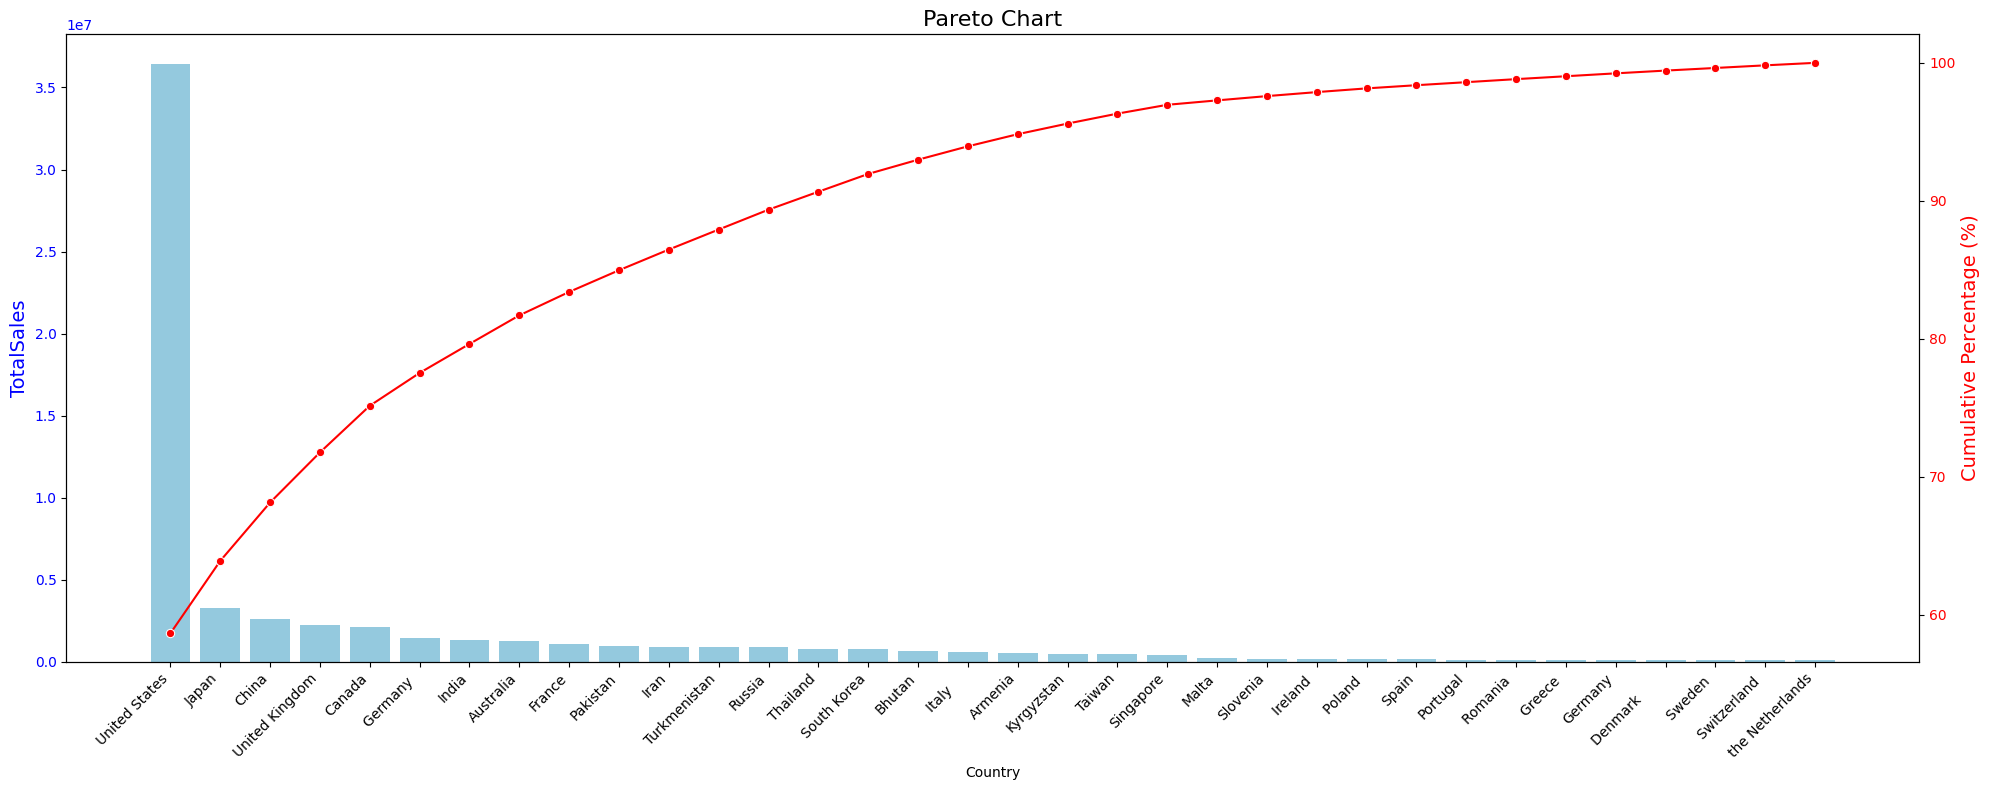

In [66]:
location_sales = pd.merge(store_location_df, sales_staff_df, on="LocationId", how="inner")
location_sales = pd.merge(staff_df, location_sales, on="EmployeeId", how="inner")

location_sales_analysis = location_sales.groupby("Country")["TotalSales"].sum().reset_index().sort_values(by="TotalSales", ascending=False)

total_location_sales = location_sales_analysis["TotalSales"].sum()

location_sales_analysis["CF"] = round(location_sales_analysis["TotalSales"].cumsum() / total_location_sales * 100, 2)

plot_pareto(df=location_sales_analysis, x_col="Country", y_col="TotalSales", cf='CF')

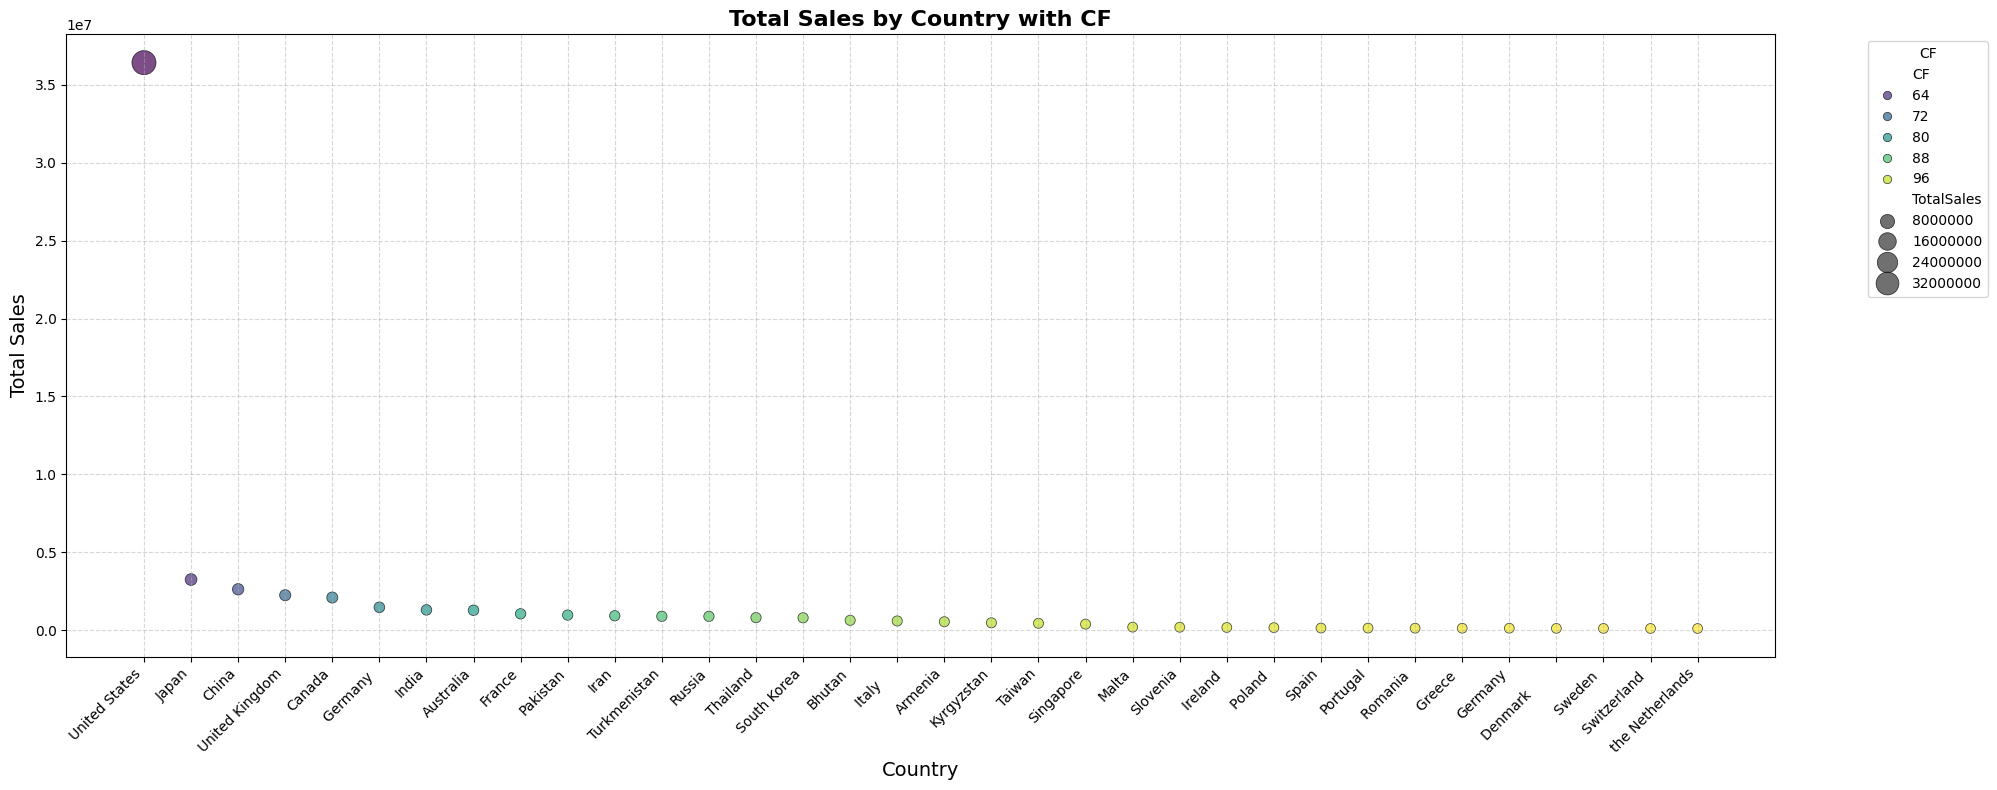

In [73]:
plt.figure(figsize=(20, 8))
sns.scatterplot(
    data=location_sales_analysis, 
    x="Country", 
    y="TotalSales", 
    hue="CF", 
    size="TotalSales",  
    sizes=(50, 300), 
    alpha=0.7, 
    palette="viridis",  
    edgecolor="black"  
)

plt.xticks(rotation=45, ha="right") 
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.title("Total Sales by Country with CF", fontsize=16, fontweight="bold")
plt.legend(title="CF", bbox_to_anchor=(1.05, 1), loc="upper left")  
plt.grid(True, linestyle="--", alpha=0.5) 

plt.tight_layout()
plt.show()
